MODELLO GENERALE

In [3]:
import random as rd
import numpy as np
import matplotlib.pyplot as plot


Nel main richiamo le funzioni che servono per simulare l'estrazione e la scelta del giocatore singolo.
Le funzioni che servono:
-generare colore urna (universo)
-generare numero giocatori
-creare un vettore che contiene le palline in numero giusto in base allo stato dell'universo
-estrarre una pallina dal vettore in modo casuale
-calcolare la probabilità bayesiana
-decidere se accettare o meno l'opzione


media passi 6.140553336292351
media ribelli 23.291654112684544


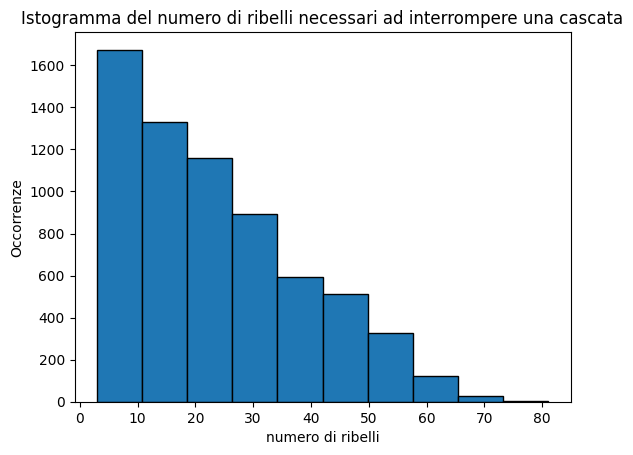

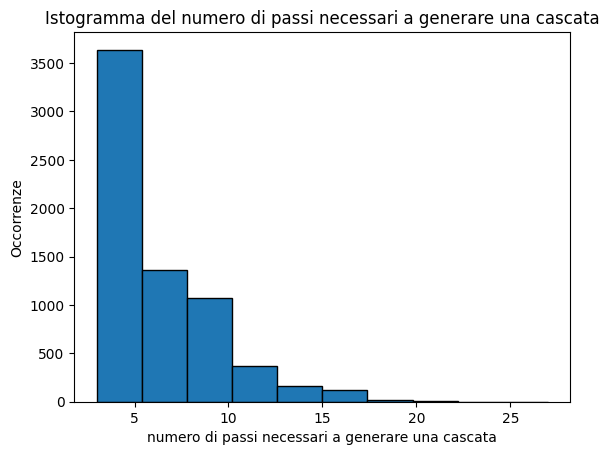

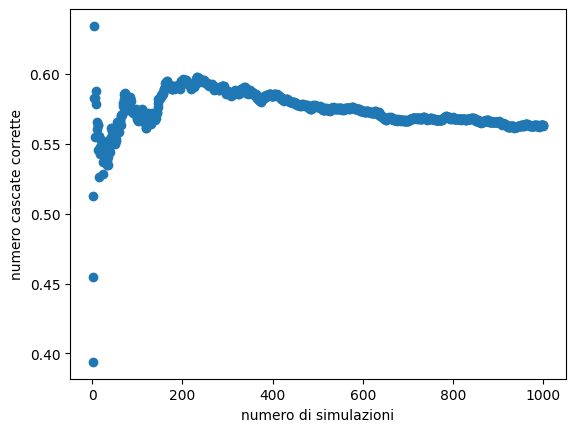

In [4]:
priorblue = 0.5
priorred = 0.5
blue = 0
red = 1
#q è la prob che dato lo stato good si abbia un high signal e dato lo stato bad si abbia un low signal (prob che la pallina sia rossa se l'urna è a maggioranza rossa e blu se è a maggioranza blu)
q = 2/3
    
#definisce in modo casuale lo stato dell'universo (maggioranza rossa, maggioranza blu)
def universe():
    state = rd.randint(0,1)
    return state

#definisce il numero di partecipanti all'esperimento
def partecipants():
    num = rd.randint(3,100)
    return num

#riempie un vettore con la corretta proporzione di palline a seconda dello stato dell'universo
def vector_world(state):
    alternative = [0,1]
    if state == 1:
        world = [1,1,0]
    else:
        world = [0,0,1]
    return world

#effettua l'estrazione della pallina dall'urna
def extraction(world):
    signal = rd.choice(world)
    return signal

#calcola la probabilità che data una serie di segnali, l'urna sia a maggioranza rossa o blu
def bayes(p, a , b , q):
    denom = ( p * (q**a) * ((1-q)**b) + (1-p) * ((1-q)**a) * (q**b) )
    if denom == 0:
        denom = np.nextafter(0, 1)
    post = ( p * (q**a) * ((1-q)**b) )/ denom
    return post

#effettua la scelta in base alle posterior
def make_decision(postblue, postred, signal):
    if postblue > postred:
        choice = 0
    elif postblue < postred:
        choice = 1 
    else:
        choice = signal
    return choice

#dinamica per un partecipante
def singlepartecipant(a, b, q, state, world, correct_signal, count_coherent, count_incoherent):
    
    signal = extraction(world)

    if signal == state:
        correct_signal += 1

    if signal == 1:
        a += 1
    else:
        b += 1
    
    postred = bayes(priorred, a, b, q)
    postblue = 1 - postred
   
    choice = make_decision(postblue, postred, signal)

    if signal == choice:

        count_coherent += 1

        return a, b, choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal

    else:

        if signal == 1: 
            a -= 1
            b += 1
        else:
            a += 1
            b -= 1
            
        count_incoherent += 1
          
        return a, b, choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal

#se il giocatore effettua una scelta incoerente significa che si è verificata la cascata e la funzione torna false,torna true se non si è verificata
def controller(choice,signal):
    if choice == signal:
        return True
    return False

def rebel(a, b, var, state, correct_signal, count_coherent, count_incoherent, q):
    
    choice = var
    signal = extraction(world)

    if choice == state:
        correct_signal += 1

    if choice == 1:
        a += 1
    else:
        b += 1
        
    if choice == signal:
        count_coherent += 1
    else:
        count_incoherent += 1
    
    postred = bayes(priorred, a, b, q)
    postblue = 1 - postred

    return a, b, choice, count_coherent, count_incoherent,correct_signal, postblue, postred

#vettore che raccoglie il numero di volte in cui la scelta = segnale ad ogni esperimento
vector_coherent = []

#vettore che raccoglie il numero di volte in cui la scelta è diversa dal segnale ad ogni esperimento
vector_incoherent = []

#vettore che raccoglie il numero di volte che la cascata porta alla soluzione corretta
correct_guesses = []

#vettore che raccoglie il numero di partecipanti per ogni simulazione
vector_participants = []

#vettore che raccoglie in ogni simulazione il numero di passi necessari a dare avvio ad una cascata
counter = []

#vettore che raccoglie in ogni simulazione il numero di ribelli necessari a interrompere la cascata
vect_rebel = []
    
#vettore che raccoglie l'indice di ogni simulazione
vector_sim = []

#contatore per numero di volte in cui la cascata porta ad un risultato corretto
num_correct_cascade = 0

num_sim = 1000

correct_cascade_rate = 0
correct_guesses_rate = []

#faccio num_sim simulazioni
for j in range(0,num_sim):

    #estraggo casualmente il numero di partecipanti dell'esperimento
    numpart = partecipants()

    #vettore con i numeri da 0 a numpart
    vector_part = []

    #vettore che raccoglie i segnali
    signal_vect = []

    #vettore che raccoglie il numero di partecipanti ad ogni simulazione
    vector_participants.append(numpart)

    #creo lo stato dell'universo
    state = universe()

    #creo il vettore che contiene la giusta proporzione di palline
    world = vector_world(state)

    #calcolo la probabilità di estrarre una pallina rossa condizionata allo stato dell'universo
    q = 2/3
    
    #inizializzo contatore segnale rosso
    a = 0

    #inizializzo contatore segnale blu
    b = 0

    #vettore delle scelte
    choice = []

    #numero di volte in cui il segnale e la scelta corrispondono
    count_coherent = 0

    #numero di volte in cui il segnale e la scelta non corrispondono
    count_incoherent = 0

    #parametro di controllo per la cascata
    control = True
    i = 1
    
    #conta il numero di cascate per ogni simulazione
    counter_cascade_single_simulation = 0
    #conta il numero di passi necessari per innescare una cascata, ad ogni simulazione si resetta. Si utilizza poi per fare una media dividendo per il numero di volte che si è verificata in quella simulazione una cascata. Poi si aggiunge al vettore che tiene conto di tutte le simulazioni il risultato.
    counter_steps_single_simulation = 0
    #conta il numero di cascate corrette per ogni simulazione
    num_correct_cascade = 0
    
    correct_signal = 0
    
    diff = 0 
    num_rebel = 0
   
    #eseguo la funzione su ogni partecipante all'esperimento
    while i <= numpart:
        
        #se non si è verificata la cascata
        if control == True:  
            a, b, single_choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal = singlepartecipant(a, b, q, state, world, correct_signal, count_coherent, count_incoherent)
            vector_part.append(i)
            choice.append(single_choice)
            signal_vect.append(signal) 
            #controllo se abbia o meno avuto inizio la cascata
            control = controller(single_choice,signal)
            #se control è false ha avuto inizio la cascata
            if controller(single_choice,signal) == False:
                control = False
                counter_steps_single_simulation = i-diff
                counter.append(counter_steps_single_simulation)
                counter_cascade_single_simulation += 1   
                if ((choice[i-1] == 0 and state == 0) or (choice[i-1] == 1 and state == 1)):
                        num_correct_cascade += 1
            #print(i,a,b,"segnale",signal,"scelta",single_choice,"postred",postred,"postblue",postblue,control, "yo")
                    
        #se si è verificata la cascata
        else:
            if postblue > postred:
                while postblue > postred:
                    num_rebel += 1
                    a, b, signal, count_coherent, count_incoherent, correct_signal, postblue, postred = rebel(a,b,1,state,correct_signal,count_coherent,count_incoherent,q)
                    vector_part.append(i)
                    choice.append(signal)
                    signal_vect.append(signal)
                    control = True 
                    #print(a,b,"segnale",signal,"scelta",signal,"postred",postred,"postblue",postblue,"numero passi",counter_steps_single_simulation,"numero di cascate",counter_cascade_single_simulation,control)
            elif postred > postblue:
                while postred > postblue:
                    num_rebel += 1
                    a, b, signal, count_coherent, count_incoherent, correct_signal, postblue, postred = rebel(a,b,0,state,correct_signal,count_coherent,count_incoherent,q)
                    vector_part.append(i)
                    choice.append(signal)
                    signal_vect.append(signal)
                    control = True 
                    #print(a,b,"segnale",signal,"scelta",signal,"postred",postred,"postblue",postblue,"numero passi",counter_steps_single_simulation,"numero di cascate",counter_cascade_single_simulation,control)
            vect_rebel.append(num_rebel)
            diff = i
            control = True
        i += 1 
  
    if counter_cascade_single_simulation == 0:
        counter_cascade_single_simulation = 1
        
    correct_cascade_rate += num_correct_cascade/counter_cascade_single_simulation
                  
    #vettore che contiene il rate di correttezza della cascata dopo (j+1) simulazioni
    correct_guesses.append(correct_cascade_rate/(j+1))
    #vettore che contiene il numero della simulazione
    vector_sim.append(j+1)
    
    vector_coherent.append(count_coherent)
    vector_incoherent.append(count_incoherent)

#calcolo media
media_passi = np.mean(counter) 
print("media passi",media_passi)   

media_ribelli = np.mean(vect_rebel)
print("media ribelli",media_ribelli)

plot.hist(vect_rebel, bins=10, edgecolor='black')
plot.title("Istogramma del numero di ribelli necessari ad interrompere una cascata")
plot.xlabel("numero di ribelli")
plot.ylabel("Occorrenze")
plot.show()

plot.hist(counter, bins=10, edgecolor='black')
plot.title("Istogramma del numero di passi necessari a generare una cascata")
plot.xlabel("numero di passi necessari a generare una cascata")
plot.ylabel("Occorrenze")
plot.show()

plot.scatter(vector_sim, correct_guesses)
plot.xlabel('numero di simulazioni')
plot.ylabel('numero cascate corrette')
plot.show()


media passi 6.057232516437537
media ribelli 23.219292898506552


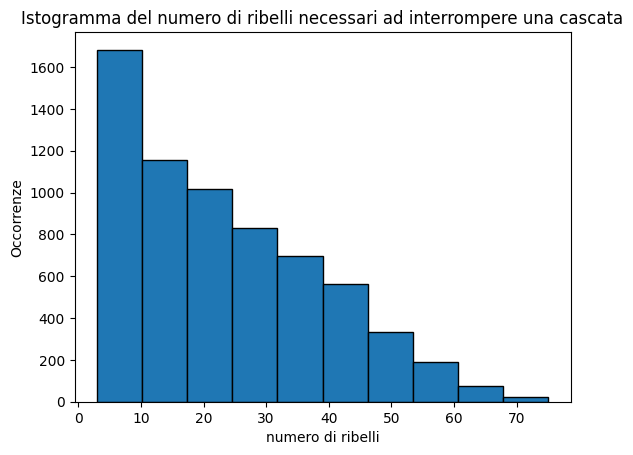

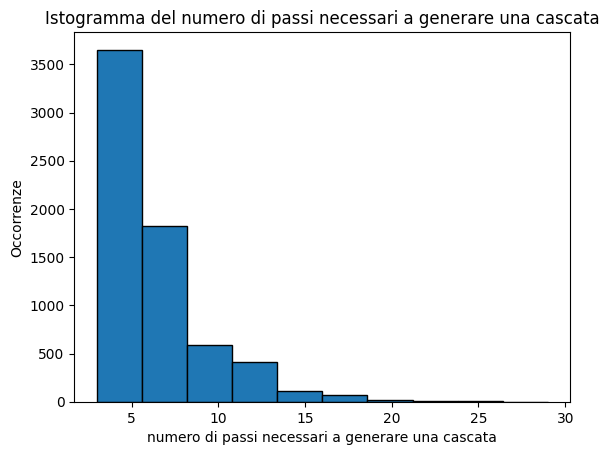

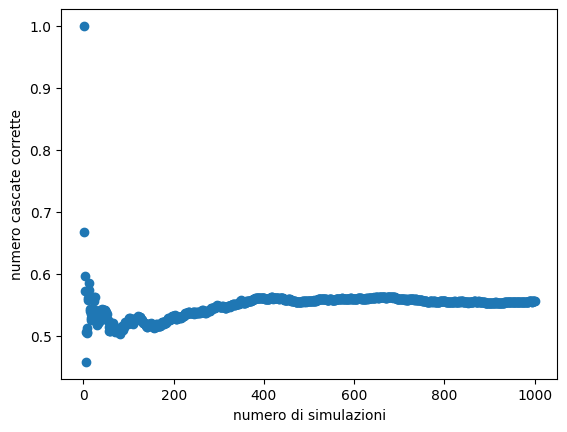

In [ ]:
priorblue = 0.5
priorred = 0.5
blue = 0
red = 1
#q è la prob che dato lo stato good si abbia un high signal e dato lo stato bad si abbia un low signal (prob che la pallina sia rossa se l'urna è a maggioranza rossa e blu se è a maggioranza blu)
q = 2/3
    
#definisce in modo casuale lo stato dell'universo (maggioranza rossa, maggioranza blu)
def universe():
    state = rd.randint(0,1)
    return state

#definisce il numero di partecipanti all'esperimento
def partecipants():
    num = rd.randint(3,100)
    return num

#riempie un vettore con la corretta proporzione di palline a seconda dello stato dell'universo
def vector_world(state):
    alternative = [0,1]
    if state == 1:
        world = [1,1,0]
    else:
        world = [0,0,1]
    return world

#effettua l'estrazione della pallina dall'urna
def extraction(world):
    signal = rd.choice(world)
    return signal

#calcola la probabilità che data una serie di segnali, l'urna sia a maggioranza rossa o blu
def bayes(p, a , b , q):
    denom = ( p * (q**a) * ((1-q)**b) + (1-p) * ((1-q)**a) * (q**b) )
    if denom == 0:
        denom = np.nextafter(0, 1)
    post = ( p * (q**a) * ((1-q)**b) )/ denom
    return post

#effettua la scelta in base alle posterior
def make_decision(postblue, postred, signal):
    if postblue > postred:
        choice = 0
    elif postblue < postred:
        choice = 1 
    else:
        choice = signal
    return choice

#se il giocatore effettua una scelta incoerente significa che si è verificata la cascata e la funzione torna false,torna true se non si è verificata
def controller(choice,signal):
    if choice == signal:
        return True
    return False


#dinamica per un partecipante
def singlepartecipant(a, b, q, state, world, correct_signal, count_coherent, count_incoherent):
    
    signal = extraction(world)

    if signal == state:
        correct_signal += 1

    if signal == 1:
        a += 1
    else:
        b += 1
    
    postred = bayes(priorred, a, b, q)
    postblue = 1 - postred
   
    choice = make_decision(postblue, postred, signal)

    if signal == choice:

        count_coherent += 1

        return a, b, choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal

    else:

        if signal == 1: 
            a -= 1
            b += 1
        else:
            a += 1
            b -= 1
            
        count_incoherent += 1
          
        return a, b, choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal

def verify_cascade(choices):
        #se il partecipante compie una scelta incoerente allora inizia la cascata , se choices è false si è verificata la cascata
        if choices == False:
            control = False 
        else:
            control = True
        return control

def rebel(a, b, var, state, correct_signal, count_coherent, count_incoherent, q):
    
    choice = var
    signal = extraction(world)

    if choice == state:
        correct_signal += 1

    if choice == 1:
        a += 1
    else:
        b += 1
        
    if choice == signal:
        count_coherent += 1
    else:
        count_incoherent += 1
    
    postred = bayes(priorred, a, b, q)
    postblue = 1 - postred

    return a, b, choice, count_coherent, count_incoherent,correct_signal, postblue, postred

#vettore che raccoglie il numero di volte in cui la scelta = segnale ad ogni esperimento
vector_coherent = []

#vettore che raccoglie il numero di volte in cui la scelta è diversa dal segnale ad ogni esperimento
vector_incoherent = []

#vettore che raccoglie il numero di volte che la cascata porta alla soluzione corretta
correct_guesses = []

#vettore che raccoglie il numero di partecipanti per ogni simulazione
vector_participants = []

#vettore che raccoglie in ogni simulazione il numero di passi necessari a dare avvio ad una cascata
counter = []

#vettore che raccoglie in ogni simulazione il numero di ribelli necessari a interrompere la cascata
vect_rebel = []
    
#vettore che raccoglie l'indice di ogni simulazione
vector_sim = []

#contatore per numero di volte in cui la cascata porta ad un risultato corretto
num_correct_cascade = 0

num_sim = 1000

correct_cascade_rate = 0
correct_guesses_rate = []

#faccio num_sim simulazioni
for j in range(0,num_sim):

    #estraggo casualmente il numero di partecipanti dell'esperimento
    numpart = partecipants()

    #vettore con i numeri da 0 a numpart
    vector_part = []

    #vettore che raccoglie i segnali
    signal_vect = []

    #vettore che raccoglie il numero di partecipanti ad ogni simulazione
    vector_participants.append(numpart)

    #creo lo stato dell'universo
    state = universe()

    #creo il vettore che contiene la giusta proporzione di palline
    world = vector_world(state)

    #calcolo la probabilità di estrarre una pallina rossa condizionata allo stato dell'universo
    q = 2/3
    
    #inizializzo contatore segnale rosso
    a = 0

    #inizializzo contatore segnale blu
    b = 0

    #vettore delle scelte
    choice = []

    #numero di volte in cui il segnale e la scelta corrispondono
    count_coherent = 0

    #numero di volte in cui il segnale e la scelta non corrispondono
    count_incoherent = 0

    #parametro di controllo per la cascata
    control = True
    i = 1
    
    #conta il numero di cascate per ogni simulazione
    counter_cascade_single_simulation = 0
    #conta il numero di passi necessari per innescare una cascata, ad ogni simulazione si resetta. Si utilizza poi per fare una media dividendo per il numero di volte che si è verificata in quella simulazione una cascata. Poi si aggiunge al vettore che tiene conto di tutte le simulazioni il risultato.
    counter_steps_single_simulation = 0
    #conta il numero di cascate corrette per ogni simulazione
    num_correct_cascade = 0
    
    correct_signal = 0
    
    diff = 0 
    num_rebel = 0
   
    #eseguo la funzione su ogni partecipante all'esperimento
    while i <= numpart:
        
        #se non si è verificata la cascata
        if control == True:  
            a, b, single_choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal = singlepartecipant(a, b, q, state, world, correct_signal, count_coherent, count_incoherent)
            vector_part.append(i)
            choice.append(single_choice)
            signal_vect.append(signal) 
            #controllo se abbia o meno avuto inizio la cascata
            var = controller(single_choice,signal)
            control = verify_cascade(var) 
            if control == False:
                counter_steps_single_simulation = i-diff
                counter.append(counter_steps_single_simulation)
                counter_cascade_single_simulation += 1   
                if ((choice[i-1] == 0 and state == 0) or (choice[i-1] == 1 and state == 1)):
                        num_correct_cascade += 1
            #print(i,a,b,"segnale",signal,"scelta",single_choice,"postred",postred,"postblue",postblue,control, "yo")
                    
        #se si è verificata la cascata
        else:
            if postblue > postred:
                while postblue > postred:
                    num_rebel += 1
                    a, b, signal, count_coherent, count_incoherent, correct_signal, postblue, postred = rebel(a,b,1,state,correct_signal,count_coherent,count_incoherent,q)
                    vector_part.append(i)
                    choice.append(signal)
                    signal_vect.append(signal)
                    control = True 
                    #print(a,b,"segnale",signal,"scelta",signal,"postred",postred,"postblue",postblue,"numero passi",counter_steps_single_simulation,"numero di cascate",counter_cascade_single_simulation,control)
            elif postred > postblue:
                while postred > postblue:
                    num_rebel += 1
                    a, b, signal, count_coherent, count_incoherent, correct_signal, postblue, postred = rebel(a,b,0,state,correct_signal,count_coherent,count_incoherent,q)
                    vector_part.append(i)
                    choice.append(signal)
                    signal_vect.append(signal)
                    control = True 
                    #print(a,b,"segnale",signal,"scelta",signal,"postred",postred,"postblue",postblue,"numero passi",counter_steps_single_simulation,"numero di cascate",counter_cascade_single_simulation,control)
            vect_rebel.append(num_rebel)
            diff = i
            control = True
        i += 1 
  
    if counter_cascade_single_simulation == 0:
        counter_cascade_single_simulation = 1
        
    correct_cascade_rate += num_correct_cascade/counter_cascade_single_simulation
                  
    #vettore che contiene il rate di correttezza della cascata dopo (j+1) simulazioni
    correct_guesses.append(correct_cascade_rate/(j+1))
    #vettore che contiene il numero della simulazione
    vector_sim.append(j+1)
    
    vector_coherent.append(count_coherent)
    vector_incoherent.append(count_incoherent)

#calcolo media
media_passi = np.mean(counter) 
print("media passi",media_passi)   

media_ribelli = np.mean(vect_rebel)
print("media ribelli",media_ribelli)

plot.hist(vect_rebel, bins=10, edgecolor='black')
plot.title("Istogramma del numero di ribelli necessari ad interrompere una cascata")
plot.xlabel("numero di ribelli")
plot.ylabel("Occorrenze")
plot.show()

plot.hist(counter, bins=10, edgecolor='black')
plot.title("Istogramma del numero di passi necessari a generare una cascata")
plot.xlabel("numero di passi necessari a generare una cascata")
plot.ylabel("Occorrenze")
plot.show()

plot.scatter(vector_sim, correct_guesses)
plot.xlabel('numero di simulazioni')
plot.ylabel('numero cascate corrette')
plot.show()


In [1]:
priorblue = 0.5
priorred = 0.5
blue = 0
red = 1
#q è la prob che dato lo stato good si abbia un high signal e dato lo stato bad si abbia un low signal (prob che la pallina sia rossa se l'urna è a maggioranza rossa e blu se è a maggioranza blu)
q = 2/3
    
#definisce in modo casuale lo stato dell'universo (maggioranza rossa, maggioranza blu)
def universe():
    state = rd.randint(0,1)
    return state

#definisce il numero di partecipanti all'esperimento
def partecipants():
    num = rd.randint(3,100)
    return num

#riempie un vettore con la corretta proporzione di palline a seconda dello stato dell'universo
def vector_world(state):
    alternative = [0,1]
    if state == 1:
        world = [1,1,0]
    else:
        world = [0,0,1]
    return world

#effettua l'estrazione della pallina dall'urna
def extraction(world):
    signal = rd.choice(world)
    return signal

#calcola la probabilità che data una serie di segnali, l'urna sia a maggioranza rossa o blu
def bayes(p, a , b , q):
    denom = ( p * (q**a) * ((1-q)**b) + (1-p) * ((1-q)**a) * (q**b) )
    if denom == 0:
        denom = np.nextafter(0, 1)
    post = ( p * (q**a) * ((1-q)**b) )/ denom
    return post

#effettua la scelta in base alle posterior
def make_decision(postblue, postred, signal):
    if postblue > postred:
        choice = 0
    elif postblue < postred:
        choice = 1 
    else:
        choice = signal
    return choice

#se il giocatore effettua una scelta incoerente significa che si è verificata la cascata e la funzione torna false,torna true se non si è verificata
def controller(choice,signal):
    if choice == signal:
        return True
    return False


#dinamica per un partecipante
def singlepartecipant(a, b, q, state, world, correct_signal, count_coherent, count_incoherent):
    
    signal = extraction(world)

    if signal == state:
        correct_signal += 1

    if signal == 1:
        a += 1
    else:
        b += 1
    
    postred = bayes(priorred, a, b, q)
    postblue = 1 - postred
   
    choice = make_decision(postblue, postred, signal)

    if signal == choice:

        count_coherent += 1

        return a, b, choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal

    else:

        if signal == 1: 
            a -= 1
            b += 1
        else:
            a += 1
            b -= 1
            
        count_incoherent += 1
          
        return a, b, choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal

def verify_cascade(choices):
        #se il partecipante compie una scelta incoerente allora inizia la cascata , se choices è false si è verificata la cascata
        if choices == False:
            control = False 
        else:
            control = True
        return control

def rebel(a, b, var, state, correct_signal, count_coherent, count_incoherent, q):
    
    choice = var
    signal = extraction(world)

    if choice == state:
        correct_signal += 1

    if choice == 1:
        a += 1
    else:
        b += 1
        
    if choice == signal:
        count_coherent += 1
    else:
        count_incoherent += 1
    
    postred = bayes(priorred, a, b, q)
    postblue = 1 - postred

    return a, b, choice, count_coherent, count_incoherent,correct_signal, postblue, postred

#vettore che raccoglie il numero di volte in cui la scelta = segnale ad ogni esperimento
vector_coherent = []

#vettore che raccoglie il numero di volte in cui la scelta è diversa dal segnale ad ogni esperimento
vector_incoherent = []

#vettore che raccoglie il numero di volte che la cascata porta alla soluzione corretta
correct_guesses = []

#vettore che raccoglie il numero di partecipanti per ogni simulazione
vector_participants = []

#vettore che raccoglie in ogni simulazione il numero di passi necessari a dare avvio ad una cascata
counter = []

#vettore che raccoglie in ogni simulazione il numero di ribelli necessari a interrompere la cascata
vect_rebel = []
    
#vettore che raccoglie l'indice di ogni simulazione
vector_sim = []

#contatore per numero di volte in cui la cascata porta ad un risultato corretto
num_correct_cascade = 0

num_sim = 1000

correct_cascade_rate = 0
correct_guesses_rate = []

#faccio num_sim simulazioni
for j in range(0,num_sim):

    #estraggo casualmente il numero di partecipanti dell'esperimento
    numpart = partecipants()

    #vettore con i numeri da 0 a numpart
    vector_part = []

    #vettore che raccoglie i segnali
    signal_vect = []

    #vettore che raccoglie il numero di partecipanti ad ogni simulazione
    vector_participants.append(numpart)

    #creo lo stato dell'universo
    state = universe()

    #creo il vettore che contiene la giusta proporzione di palline
    world = vector_world(state)

    #calcolo la probabilità di estrarre una pallina rossa condizionata allo stato dell'universo
    q = 2/3
    
    #inizializzo contatore segnale rosso
    a = 0

    #inizializzo contatore segnale blu
    b = 0

    #vettore delle scelte
    choice = []

    #numero di volte in cui il segnale e la scelta corrispondono
    count_coherent = 0

    #numero di volte in cui il segnale e la scelta non corrispondono
    count_incoherent = 0

    #parametro di controllo per la cascata
    control = True
    i = 1
    
    #conta il numero di cascate per ogni simulazione
    counter_cascade_single_simulation = 0
    #conta il numero di passi necessari per innescare una cascata, ad ogni simulazione si resetta. Si utilizza poi per fare una media dividendo per il numero di volte che si è verificata in quella simulazione una cascata. Poi si aggiunge al vettore che tiene conto di tutte le simulazioni il risultato.
    counter_steps_single_simulation = 0
    #conta il numero di cascate corrette per ogni simulazione
    num_correct_cascade = 0
    
    correct_signal = 0
    
    diff = 0 
    num_rebel = 0
   
    #eseguo la funzione su ogni partecipante all'esperimento
    while i <= numpart:
        
        #se non si è verificata la cascata
        if control == True:  
            a, b, single_choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal = singlepartecipant(a, b, q, state, world, correct_signal, count_coherent, count_incoherent)
            vector_part.append(i)
            choice.append(single_choice)
            signal_vect.append(signal) 
            #controllo se abbia o meno avuto inizio la cascata
            if controller(single_choice,signal) == False:
                counter_steps_single_simulation = i-diff
                counter.append(counter_steps_single_simulation)
                counter_cascade_single_simulation += 1   
                if ((choice[i-1] == 0 and state == 0) or (choice[i-1] == 1 and state == 1)):
                        num_correct_cascade += 1
            #print(i,a,b,"segnale",signal,"scelta",single_choice,"postred",postred,"postblue",postblue,control, "yo")
                    
        #se si è verificata la cascata
        else:
            if postblue > postred:
                while postblue > postred:
                    num_rebel += 1
                    a, b, signal, count_coherent, count_incoherent, correct_signal, postblue, postred = rebel(a,b,1,state,correct_signal,count_coherent,count_incoherent,q)
                    vector_part.append(i)
                    choice.append(signal)
                    signal_vect.append(signal)
                    control = True 
                    #print(a,b,"segnale",signal,"scelta",signal,"postred",postred,"postblue",postblue,"numero passi",counter_steps_single_simulation,"numero di cascate",counter_cascade_single_simulation,control)
            elif postred > postblue:
                while postred > postblue:
                    num_rebel += 1
                    a, b, signal, count_coherent, count_incoherent, correct_signal, postblue, postred = rebel(a,b,0,state,correct_signal,count_coherent,count_incoherent,q)
                    vector_part.append(i)
                    choice.append(signal)
                    signal_vect.append(signal)
                    control = True 
                    #print(a,b,"segnale",signal,"scelta",signal,"postred",postred,"postblue",postblue,"numero passi",counter_steps_single_simulation,"numero di cascate",counter_cascade_single_simulation,control)
            vect_rebel.append(num_rebel)
            diff = i
            control = True
        i += 1 
  
    if counter_cascade_single_simulation == 0:
        counter_cascade_single_simulation = 1
        
    correct_cascade_rate += num_correct_cascade/counter_cascade_single_simulation
                  
    #vettore che contiene il rate di correttezza della cascata dopo (j+1) simulazioni
    correct_guesses.append(correct_cascade_rate/(j+1))
    #vettore che contiene il numero della simulazione
    vector_sim.append(j+1)
    
    vector_coherent.append(count_coherent)
    vector_incoherent.append(count_incoherent)

#calcolo media
media_passi = np.mean(counter) 
print("media passi",media_passi)   

media_ribelli = np.mean(vect_rebel)
print("media ribelli",media_ribelli)

plot.hist(vect_rebel, bins=10, edgecolor='black')
plot.title("Istogramma del numero di ribelli necessari ad interrompere una cascata")
plot.xlabel("numero di ribelli")
plot.ylabel("Occorrenze")
plot.show()

plot.hist(counter, bins=10, edgecolor='black')
plot.title("Istogramma del numero di passi necessari a generare una cascata")
plot.xlabel("numero di passi necessari a generare una cascata")
plot.ylabel("Occorrenze")
plot.show()

plot.scatter(vector_sim, correct_guesses)
plot.xlabel('numero di simulazioni')
plot.ylabel('numero cascate corrette')
plot.show()


IndentationError: unexpected indent (3577973213.py, line 219)